# Neighborhood Operations

## Import Libraries 

In [5]:
import cv2
## import other needed libraries ##
##... CODE HERE ...##
import numpy as np
from matplotlib import pyplot as plt
from scipy.ndimage.filters import convolve

## Read Images

In [2]:
## read all the images ##
##... CODE HERE ...##
image_1 = cv2.imread("Team_15_Image_01.png")
image_2 = cv2.imread("Team_15_Image_02.jpg")

## Show Images 

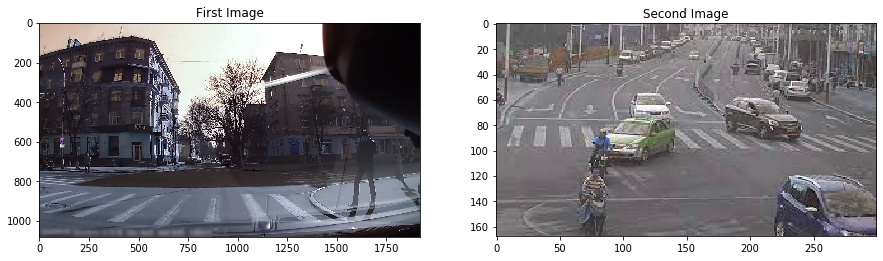

In [3]:
## show all images ##
##... CODE HERE ...##
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (15,15))
ax1.imshow(image_1);
ax1.set_title('First Image');
ax2.imshow(image_2);
ax2.set_title('Second Image');

## Perform Image Smoothing Operation using Averaging Filters

True

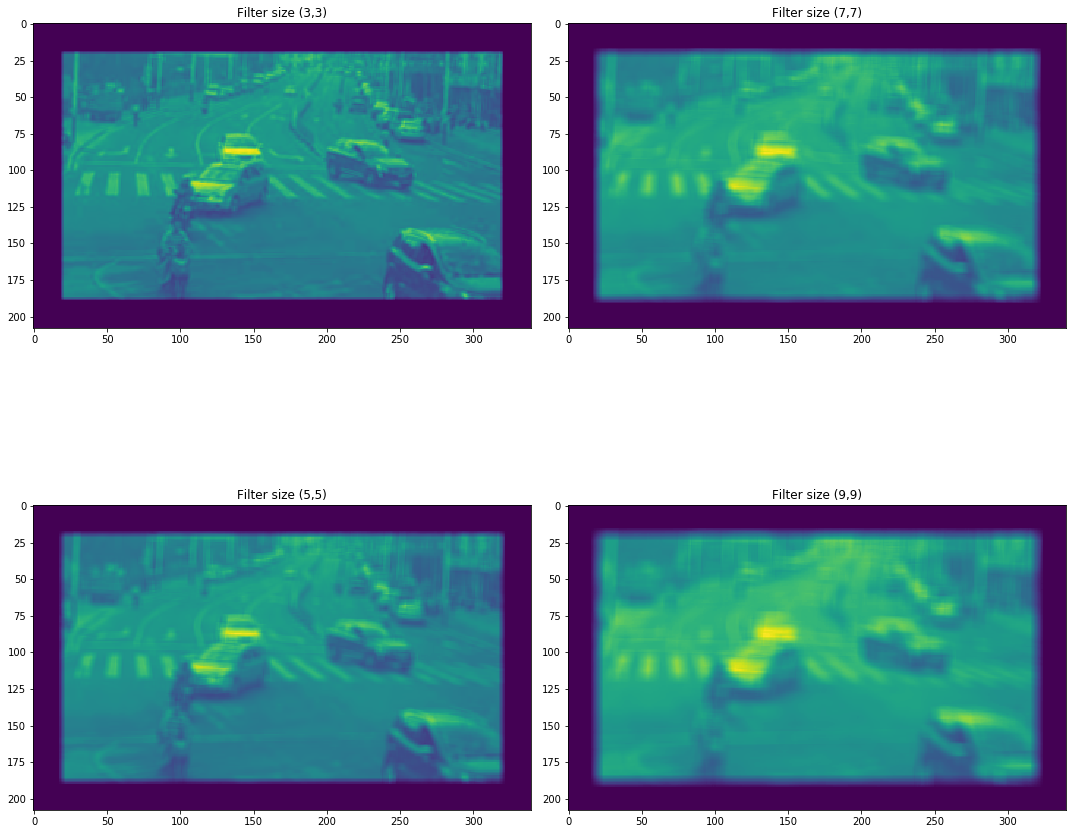

In [4]:
## perform image filteration using several filter sizes and different padding methods ##
##... CODE HERE ...##
## Convert To gray scale
img_gray=cv2.cvtColor(image_2, cv2.COLOR_RGB2GRAY)
# Adding Padding to the image
black = [0,0,0]
img1 = cv2.imread('input.png')
constant= cv2.copyMakeBorder(img_gray,20,20,20,20,cv2.BORDER_CONSTANT,value=black)
# Applying Averarge Filters to the image
n_3=3
kernel_3 = np.ones((n_3,n_3),np.float32)/(n_3*n_3)
filt_avg_3 = cv2.filter2D(constant,-1,kernel_3)

n_5=5
kernel_5 = np.ones((n_5,n_5),np.float32)/(n_5*n_5)
filt_avg_5 = cv2.filter2D(constant,-1,kernel_5)

n_7=7
kernel_7 = np.ones((n_7,n_7),np.float32)/(n_7*n_7)
filt_avg_7 = cv2.filter2D(constant,-1,kernel_7)

n_9=9
kernel_9 = np.ones((n_9,n_9),np.float32)/(n_9*n_9)
filt_avg_9 = cv2.filter2D(constant,-1,kernel_9)

## show the filtered images ##
##... CODE HERE ...##
fig, axs = plt.subplots(2, 2,figsize = (15,15))
axs[0, 0].imshow(filt_avg_3)
axs[0, 0].set_title("Filter size (3,3)")
axs[1, 0].imshow(filt_avg_5)
axs[1, 0].set_title("Filter size (5,5)")
# axs[1, 0].sharex(axs[0, 0])
axs[0, 1].imshow(filt_avg_7)
axs[0, 1].set_title("Filter size (7,7)")
axs[1, 1].imshow(filt_avg_9)
axs[1, 1].set_title("Filter size (9,9)")
fig.tight_layout()
## save the filtered images ##
##... CODE HERE ...##
cv2.imwrite("Filter Size_(3,3).png",filt_avg_3)
cv2.imwrite("Filter Size_(5,5).png",filt_avg_5)
cv2.imwrite("Filter Size_(7,7).png",filt_avg_7)
cv2.imwrite("Filter Size_(9,9).png",filt_avg_9)


## Perform Image Smoothing Operation using Gaussian Filters

True

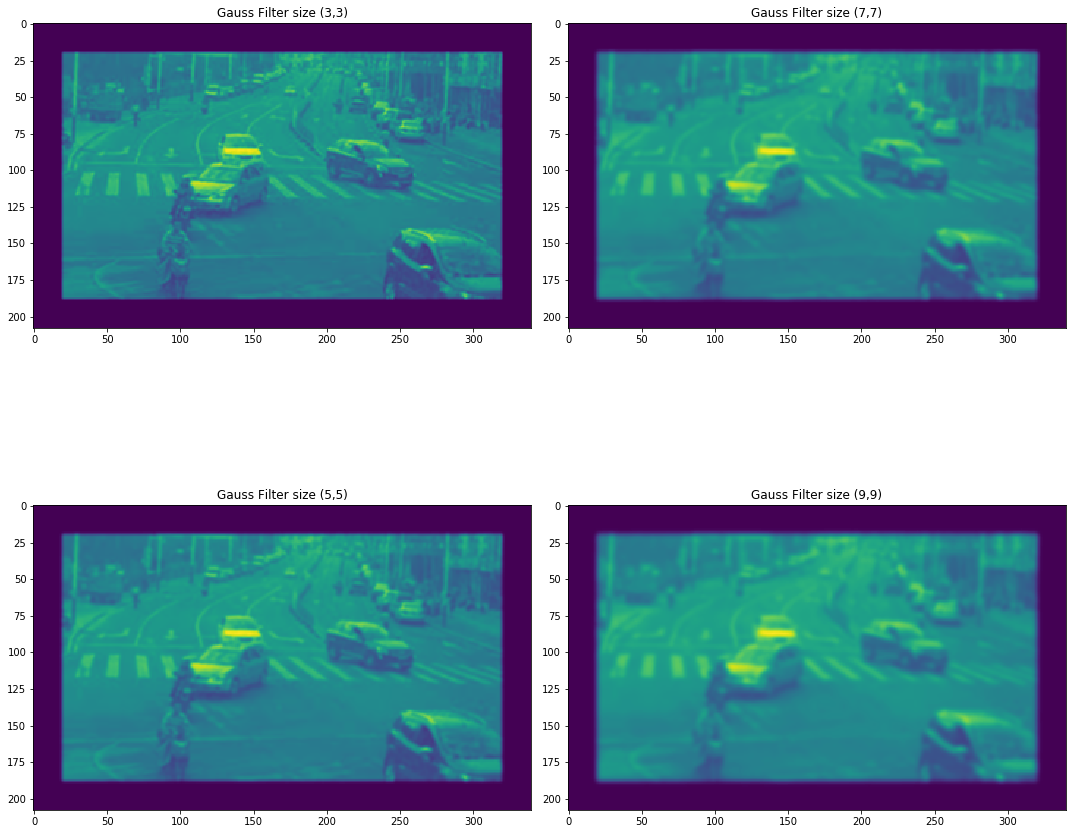

In [24]:
## perform image filteration using several filter sizes and different padding methods ##
##... CODE HERE ...##

filt_gauss_3=cv2.GaussianBlur(constant,(3,3),0)
filt_gauss_5=cv2.GaussianBlur(constant,(5,5),0)
filt_gauss_7=cv2.GaussianBlur(constant,(7,7),0)
filt_gauss_9=cv2.GaussianBlur(constant,(9,9),0)
## show the filtered images ##
##... CODE HERE ...##
fig, axs = plt.subplots(2, 2,figsize = (15,15))
axs[0, 0].imshow(filt_gauss_3)
axs[0, 0].set_title("Gauss Filter size (3,3)")
axs[1, 0].imshow(filt_gauss_5)
axs[1, 0].set_title("Gauss Filter size (5,5)")
# axs[1, 0].sharex(axs[0, 0])
axs[0, 1].imshow(filt_gauss_7)
axs[0, 1].set_title("Gauss Filter size (7,7)")
axs[1, 1].imshow(filt_gauss_9)
axs[1, 1].set_title("Gauss Filter size (9,9)")
fig.tight_layout()
## save the filtered images ##
##... CODE HERE ...##
cv2.imwrite("Gauss Filter Size_(3,3).png",filt_gauss_3)
cv2.imwrite("Gauss Filter Size_(5,5).png",filt_gauss_5)
cv2.imwrite("Gauss Filter Size_(7,7).png",filt_gauss_7)
cv2.imwrite("Gauss Filter Size_(9,9).png",filt_gauss_9)


## Filteration Function

True

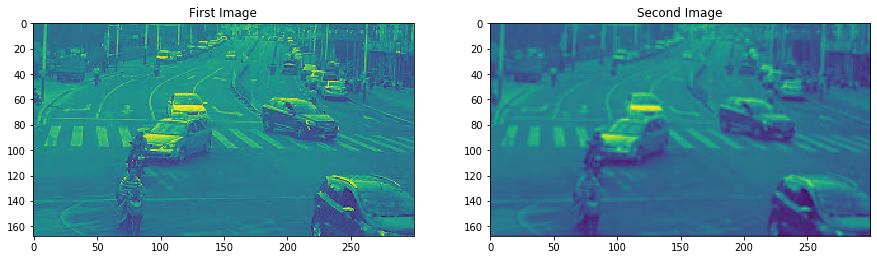

In [45]:
## define the filteration function ##
def filteration_func(image , kernel_size):
    ## build a 2D filter manually, loop over the whole image and ##
    ## perform 2D convolution by hand ##  
    ##... CODE HERE ...##
        # Flip the kernel
    kernel = np.ones(kernel_size,np.float32)/(kernel_size[0]*kernel_size[0])
    # convolution output
    output = np.zeros_like(image)

    # Add zero padding to the input image
    image_padded = np.zeros((image.shape[0] + 2, image.shape[1] + 2))
    image_padded[1:-1, 1:-1] = image

    # Loop over every pixel of the image
    for x in range(image.shape[1]):
        for y in range(image.shape[0]):
            output[y, x]=(kernel * image_padded[y: y+3, x: x+3]).sum()
    return output
## show the filtered images ##
##... CODE HERE ...##
output = filteration_func(img_gray,(3,3))
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (15,15))
ax1.imshow(img_gray);
ax1.set_title('First Image');
ax2.imshow(output);
ax2.set_title('Second Image');
## save the filtered images ##
##... CODE HERE ...##
cv2.imwrite("Filter_BY_Hand.png",output)

## Thank you :)